<a href="https://colab.research.google.com/github/RegiTelma/NLP/blob/main/Language_Generation_with_Sherlock_holm_stories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import random
import shutil
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras import models, layers
from tqdm import tqdm

In [ ]:
import os
import glob
import shutil

# List of files to be downloaded.
file_urls = ["https://sherlock-holm.es/stories/plain-text/scan.txt",
              "https://sherlock-holm.es/stories/plain-text/redh.txt",
              "https://sherlock-holm.es/stories/plain-text/iden.txt",
              "https://sherlock-holm.es/stories/plain-text/bosc.txt",
              "https://sherlock-holm.es/stories/plain-text/five.txt",
              "https://sherlock-holm.es/stories/plain-text/twis.txt",
              "https://sherlock-holm.es/stories/plain-text/blue.txt",
              "https://sherlock-holm.es/stories/plain-text/spec.txt",
              "https://sherlock-holm.es/stories/plain-text/engr.txt",
              "https://sherlock-holm.es/stories/plain-text/nobl.txt",
              "https://sherlock-holm.es/stories/plain-text/bery.txt",
              "https://sherlock-holm.es/stories/plain-text/copp.txt",
              "https://sherlock-holm.es/stories/plain-text/silv.txt",
              "https://sherlock-holm.es/stories/plain-text/yell.txt",
              "https://sherlock-holm.es/stories/plain-text/stoc.txt",
              "https://sherlock-holm.es/stories/plain-text/glor.txt",
              "https://sherlock-holm.es/stories/plain-text/musg.txt",
              "https://sherlock-holm.es/stories/plain-text/reig.txt",
              "https://sherlock-holm.es/stories/plain-text/croo.txt",
              "https://sherlock-holm.es/stories/plain-text/resi.txt"
                  ]

# Just use 20 files.
file_number = 20

# Where the text files are going to live.
dataset_path = "dataset"
dataset_path_all = os.path.join(dataset_path, "all")
dataset_path_train = os.path.join(dataset_path, "train")
dataset_path_valid = os.path.join(dataset_path, "valid")

# Gather the corpus if it has not been gathered yet.
if not os.path.exists(dataset_path):

    # Create all the folders.
    for path in [dataset_path, dataset_path_all, dataset_path_train, dataset_path_valid]:
        if not os.path.exists(path):
            os.mkdir(path)

    # Download files using wget.
    download_folder = dataset_path_all
    for file_url in file_urls:
        os.system(f'wget -nc "{file_url}" -P "{download_folder}"')

    # Find all the downloaded files.
    paths_all = glob.glob(os.path.join(dataset_path_all, "*.txt"))
    print(sorted(paths_all))

    # Do not use all.
    paths_all = paths_all[:file_number]

    # Split 80/20.
    split_index = int(len(paths_all) * 0.8)
    paths_train = paths_all[:split_index]
    paths_valid = paths_all[split_index:]

    # Create train and valid folders if they don't exist.
    for path in [dataset_path_train, dataset_path_valid]:
        if not os.path.exists(path):
            os.mkdir(path)

    # Copy files.
    def copy(paths, destination):
        for path in paths:
            filename = os.path.basename(path)
            destination_path = os.path.join(destination, filename)
            shutil.copy2(path, destination_path)
    copy(paths_train, dataset_path_train)
    copy(paths_valid, dataset_path_valid)

    # Done.
    print("Corpus downloaded.")


['dataset/all/bery.txt', 'dataset/all/blue.txt', 'dataset/all/bosc.txt', 'dataset/all/copp.txt', 'dataset/all/croo.txt', 'dataset/all/engr.txt', 'dataset/all/five.txt', 'dataset/all/glor.txt', 'dataset/all/iden.txt', 'dataset/all/musg.txt', 'dataset/all/nobl.txt', 'dataset/all/redh.txt', 'dataset/all/reig.txt', 'dataset/all/resi.txt', 'dataset/all/scan.txt', 'dataset/all/silv.txt', 'dataset/all/spec.txt', 'dataset/all/stoc.txt', 'dataset/all/twis.txt', 'dataset/all/yell.txt']
Corpus downloaded.


In [ ]:
#!rm -rf dataset

In [ ]:
def create_dataset(dataset_path):
  dataset= preprocessing.text_dataset_from_directory(
      dataset_path,
      labels=None,
      batch_size=32, #Not training!
      seed=42
  )
  return dataset

dataset_original_all= create_dataset(dataset_path_all)
dataset_original_train= create_dataset(dataset_path_train)
dataset_original_valid= create_dataset(dataset_path_valid)

Found 20 files belonging to 1 classes.
Found 16 files belonging to 1 classes.
Found 4 files belonging to 1 classes.


In [ ]:
for batch in dataset_original_all:
  #print(batch.shape)
  for sample in batch:
    print(sample)
    #break

tf.Tensor(b'\n\n\n\n                      THE ADVENTURE OF THE ENGINEER\'S THUMB\n\n                               Arthur Conan Doyle\n\n\n\n     Of all the problems which have been submitted to my friend, Mr.\n     Sherlock Holmes, for solution during the years of our intimacy, there\n     were only two which I was the means of introducing to his\n     notice--that of Mr. Hatherley\'s thumb, and that of Colonel\n     Warburton\'s madness. Of these the latter may have afforded a finer\n     field for an acute and original observer, but the other was so\n     strange in its inception and so dramatic in its details that it may\n     be the more worthy of being placed upon record, even if it gave my\n     friend fewer openings for those deductive methods of reasoning by\n     which he achieved such remarkable results. The story has, I believe,\n     been told more than once in the newspapers, but, like all such\n     narratives, its effect is much less striking when set forth en bloc\n   

In [ ]:
vocabulary_size=10_000

encoder= layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize=None, #coz we dont want it to be lower case
    split="whitespace",
    output_mode="int"
)
encoder.adapt(dataset_original_all)

In [ ]:
vocabulary=encoder.get_vocabulary()
print(vocabulary[-100:]) #from 100 by [100:] and last 100 by [-100]

['sour', 'sounding', 'soundest', 'sounded,', 'sound?', 'sound.', "souls!'", "soul.'", 'soul,"', 'soul!', 'sought', 'sottish', 'sots,', "sort.'", 'sorrow,', 'sorely,', 'sore', 'soothingly,', 'soothed', 'soothe', 'sons--my', 'songs', 'son?"', 'son."', "son's,", 'somewhere."', 'somewhere.', 'sometimes.', 'sometimes,', 'something.', 'something!', 'somehow,', 'somebody,', 'sombre--a', 'sombre,', 'solved."', 'solved--what', 'solutions', 'solution--in', 'solitude', 'solid."', 'solicitors--they', 'solicitor', 'solemnly.', 'solemnly,', 'solemnity,', 'solely', 'soldier.', 'soldier,', 'soie,', 'softer', 'softened', 'soft,', 'sofa,"', 'socks,', 'socket', 'society.', "society's", 'social,', 'sociable', 'sobered', 'soar', 'soaked', "so?'", 'so-precious', 'so-called', "so,'", 'so!"', 'snug', 'snuffbox', 'snuff.', 'snow.', 'snow-storm.', 'snow-clad', 'snoring', 'snigger.', 'sneering,', 'sneak', 'snatches', 'snarls.', 'snarled.', 'snarled,', 'snarl.', 'snarl', 'snapped', 'snap.', 'snakish', 'smudge', '

#Dataset for autoregression

In [ ]:
import time

sequence_length=32

padding_token_id=0

def create_dataset_for_autoregression(dataset):
  x_inputs=[]
  y_outputs=[]

  for books in dataset:
    books=encoder(books).numpy()

    for book in tqdm(books):

      #Remove padding at the end.
      book= [x for x in list(book) if x != padding_token_id]

      #Add padding at the beginning.
      padding=[padding_token_id] * sequence_length
      book = padding + book

      #Create inputs and outputs.
      for start_index in range(0, len(book) - sequence_length):
        x=book[start_index:start_index + sequence_length]
        assert len(x)==sequence_length
        y= book[start_index + sequence_length]

        x_inputs+=[x]
        y_outputs+=[y]

  return tf.data.Dataset.from_tensor_slices((x_inputs,y_outputs))

dataset_train= create_dataset_for_autoregression(dataset_original_train)
dataset_valid=create_dataset_for_autoregression(dataset_original_valid)
print("Done!")

100%|██████████| 4/4 [00:00<00:00, 137.98it/s]


Done!


In [ ]:
def decode(indices):
  return " ".join([vocabulary[index] for index in indices if  index!=0])


for input,output in dataset_train.take(4):
  print("input:", ",".join([str(x) for x in input.numpy()]))
  print("output:", output.numpy())
  print("input decoded: ", decode(input))
  print("output decoded: ", decode([output]))

input: 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
output: 674
input decoded:  
output decoded:  THE
input: 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,674
output: 1
input decoded:  THE
output decoded:  [UNK]
input: 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,674,1
output: 1
input decoded:  THE [UNK]
output decoded:  [UNK]
input: 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,674,1,1
output: 529
input decoded:  THE [UNK] [UNK]
output decoded:  Arthur


In [ ]:
def render_history(history):
    plt.title("Training loss vs. validation loss")
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.title("Training accuracy vs. validation accuracy")
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

#Train an LSTM

In [ ]:
embedding_size=128

model=models.Sequential()
model.add(layers.Embedding(vocabulary_size,embedding_size,input_length=sequence_length))
model.add(layers.LSTM(256))
model.add(layers.Dense(vocabulary_size,activation="softmax"))
model.summary()

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history=model.fit(
    dataset_train.cache().shuffle(200_000).batch(2**6),
    epochs=10,
    validation_data=dataset_valid.cache().batch(2**6)
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 10000)             2570000   
                                                                 
Total params: 4,244,240
Trainable params: 4,244,240
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2096/2096 [==============================] - 53s 21ms/step - loss: 6.2723 - accuracy: 0.1004 - val_loss: 5.9678 - val_accuracy: 0.1308
Epoch 2/10
2096/2096 [==============================] - 18s 9ms/step - loss: 5.4332 - accuracy: 0.1530 - val_loss: 5.6895 - val_accuracy: 0.1597
Epoch 3/10
2096/209

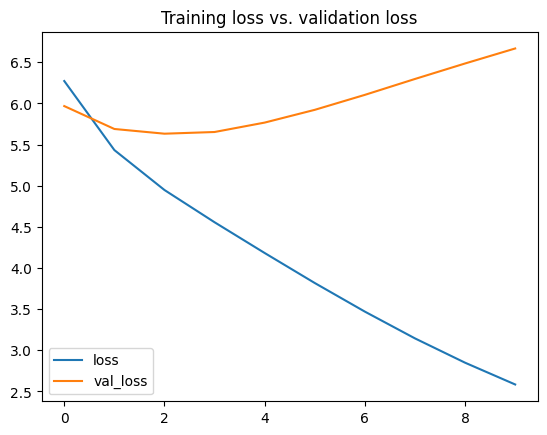

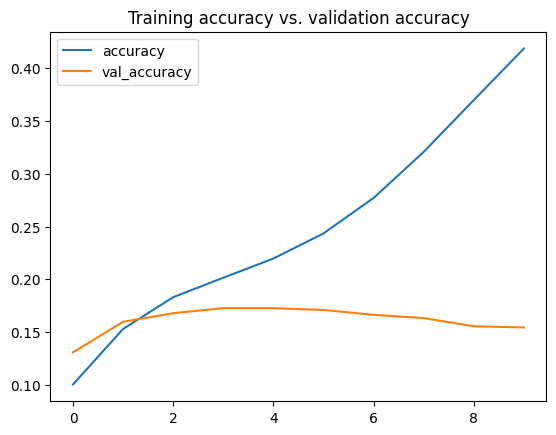

In [ ]:
import matplotlib.pyplot as plt
render_history(history)

In [ ]:
import numpy as np

def generate(model, seed_text, generated_sequence_length, temperature):

    input_sequence = encoder(seed_text).numpy()

    generated_sequence = list(input_sequence[::]) #Indices

    # Pad.
    padding = [0] * (sequence_length - len(input_sequence))
    input_sequence = padding + list(input_sequence)

    # Generate the sequence by repeatedly predicting.
    while len(generated_sequence) < generated_sequence_length:
        prediction = model.predict(np.expand_dims(input_sequence, axis=0), verbose=0)
        predicted_index = get_index_from_prediction(prediction[0], temperature)
        generated_sequence.append(predicted_index)
        input_sequence = input_sequence[1:]
        input_sequence.append(predicted_index)

    # Convert the generated sequence to a string.
    text = decode(generated_sequence)
    print(text)
    print("")


def get_index_from_prediction(prediction, temperature=0.0):
    """ Gets an index from a prediction. """

    # Zero temperature - use the argmax.
    if temperature == 0.0:
        return np.argmax(prediction)

    # Non-zero temperature - do some random magic.
    else:
        prediction = np.asarray(prediction).astype('float64')

        #
        prediction = np.log(prediction) / temperature

        #softmax
        exp_prediction= np.exp(prediction)
        prediction = exp_prediction / np.sum(exp_prediction) #probabilit distribution

        probabilities = np.random.multinomial(1, prediction, 1)
        return np.argmax(probabilities)


generate(model, "we are all doomed", 100, temperature=1.0)

we are all [UNK] very fair to the British [UNK] He had no general good glance in interest to Lord St. Simon alone, was removed he lit a large and thin and with [UNK] a heavy stick and so many regard like a [UNK] figure. The little horse on the floor of his elbow. He sank a lamp with a [UNK] position. He was absolutely a quiet, of us, clad as looking out before we were to take, had short face their interest which were in the dead end of the trembling town, Company. So indeed! What will excuse the

